In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean 
from insightface.embedder import InsightfaceEmbedder

**Insightface wrapper usage example**

Just to remind, this is a minumalistic wrapper for [Insightface](https://github.com/deepinsight/insightface) face recognition model.

This model does detection and alignment and returns an embedding.

Despite doing detection it is not suitable for images with multiple faces.

**Pre-trained model storage format**

Check out [Insightface Model Zoo](https://github.com/deepinsight/insightface/wiki/Model-Zoo) and find a model that suits you. `LResNet100E-IR,ArcFace@ms1m-refine-v2` is used in this tutorial. MXNet model dump consists of `log` file, `<name>-<epoch>.params` model weights file, `<name>-symbol.json` symbol file. 

Path to model has to be defined as `....../<model_dump_folder>/<name>`

**Initialize wrapper**

`InsightfaceEmbedder` class is all you need to launch inference with pre-trained model of choice. 

    model_path - path to model in aforementioned format
    epoch_num - is required to parse model dump correctly. Default is "0000"
    image_size - size of input image, check your model for compatability
    no_face_raise - if True, raise exception of no face is found. If False, return None if no face is found.

In [3]:
model_path = "models/model/model"
embedder = InsightfaceEmbedder(model_path=model_path, epoch_num='0000', image_size=(112, 112))

loading models/model/model 0


**Usage example**

Let's load up some images, two pics of me and some random girl from the web.

In [4]:
img_me1 = cv2.imread("test_images/me1.jpg")
img_me2 = cv2.imread("test_images/me2.jpg")
img_girl1 = cv2.imread("test_images/girl1.jpg")
img_all = cv2.imread("test_images/more_people.jpg")

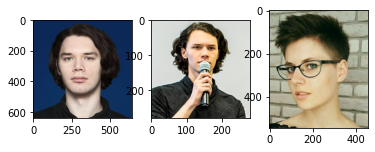

In [5]:
fig = plt.figure()
a=fig.add_subplot(1, 3, 1)
plt.imshow(img_me1[:,:, ::-1])
a=fig.add_subplot(1, 3, 2)
plt.imshow(img_me2[:,:, ::-1])
a=fig.add_subplot(1, 3, 3)
plt.imshow(img_girl1[:,:, ::-1])
# plt.show()

**Get embeddings**

`.embed_image` method takes a single-face BGR image, performs additional face detection and alignment and returns an embedding for that face. 

Embeddings are 512-dimensional vectors.

In [6]:
emb_me1 = embedder.embed_image(img_me1, return_all=True)
emb_me2 = embedder.embed_image(img_me2, return_all=True)
emb_girl1 = embedder.embed_image(img_girl1, return_all=True)
emb_people = embedder.embed_image(img_all, return_all=True)

In [7]:
#emb_me1[0].shape
emb_people.__len__()

10

**Comparing embeddings**

Distances in insightface embedding space can be measured via regular Euclidean distance.

Let's check that my faces are closer to each other than to a female face.

In [8]:
euclidean(emb_me1, emb_me2) < euclidean(emb_me1, emb_girl1),\
euclidean(emb_me1, emb_me2) < euclidean(emb_me2, emb_girl1)

(True, True)

**What if there is no face?**

Original Insightface code crashes with unintelligible segmentation fault error if wrong face detector output is fed to the model. 

We fix that and throw a nice exception or return `None` (configurable) if face detector output is not compatible with the embedding model.

In [9]:
# no_face_img = cv2.imread("test_images/pepe.jpg")
# plt.imshow(no_face_img[:,:, ::-1])
# plt.show()

In [10]:
# embedder.embed_image(no_face_img)

In [11]:
from insightface import mtcnn_detector
detector = mtcnn_detector.MtcnnDetector(model_folder="insightface/mtcnn-model/")

In [12]:
bboxes, points = detector.detect_face(img_me1)

In [13]:
# points = points.astype(int)
# detector.extract_image_chips(img_me1, points)

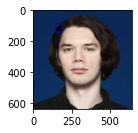

In [14]:
st_points = (int(bboxes[0][0]), int(bboxes[0][1]))
en_points = (int(bboxes[0][2]), int(bboxes[0][3]))
color = (255, 0, 0)
#img = cv2.rectangle(img_me1, st_points, en_points, color, 2)
img = cv2.circle(img_me1, st_points, 30, color, 3)
fig = plt.figure()
a=fig.add_subplot(1, 3, 3)
plt.imshow(img[:,:, ::-1])
# plt.show()